In [1]:
import tldextract

from pymongo import MongoClient

from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_links_set(db):
    links = set()

    for link_info in db.links.find():
#         for l in link_info['links']:
#             links.update(l.split('<br>'))
        links.update(link_info['links'])

    return links    

In [3]:
def filter_dict(orig):
    return {k:val for k, val in orig.items() if 
            (type(val) is int and val > 1) or (type(val) is list and len(val) > 1)}

In [4]:
rels_map = {
    1 : 'single',
    2 : 'in a relationship',
    3 : 'engaged',
    4 : 'married',
    5 : 'its complicated',
    6 : 'actively searching',
    7 : 'in love'
}

In [5]:
client = MongoClient()
db = client.ir_project

In [29]:
db.users.count()

707961

In [6]:
rel_stats = defaultdict(lambda: defaultdict(int))

In [16]:
for i, u in enumerate(db.users.find({'sex':1})):
    if 'relation' in u:
        rel_stats[u['city']][u['relation']] += 1

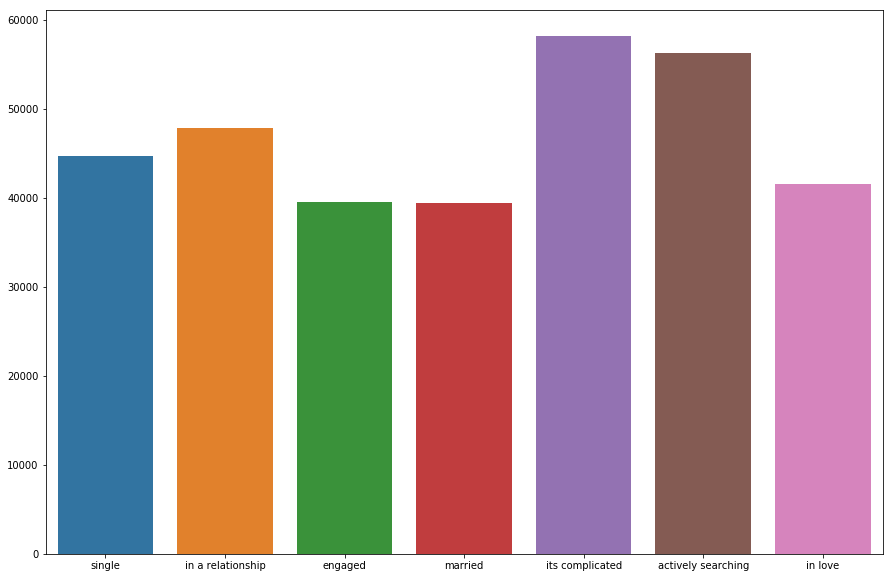

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(list(rels_map.values()), list(rel_stats[1].values()))

In [19]:
city_stats = defaultdict(int)
for i, u in enumerate(db.users.find()):
    city_stats[u['city']] += 1

In [20]:
city_stats = filter_dict(city_stats)

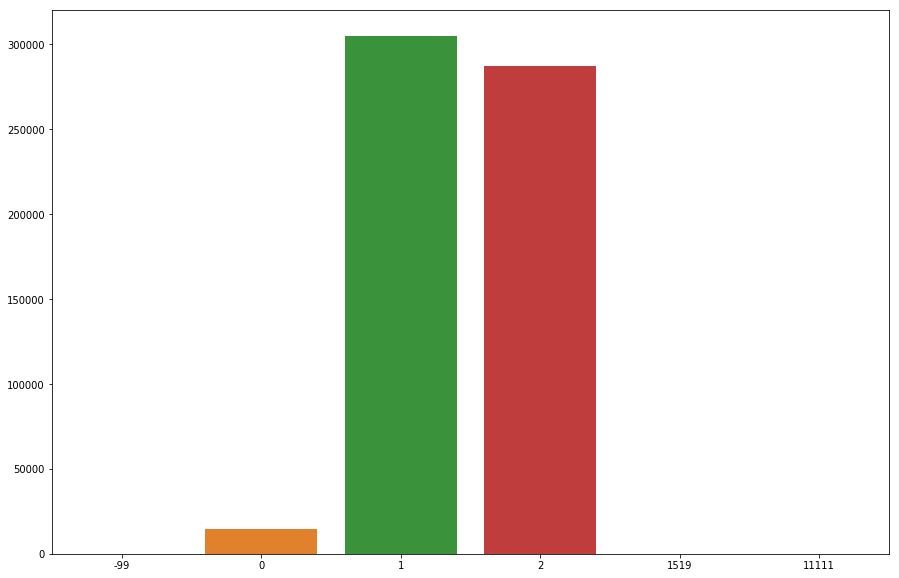

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(list(city_stats.keys()), list(city_stats.values()))

In [22]:
gender_stats = defaultdict(int)
for i, u in enumerate(db.users.find()):
    gender_stats[u['sex']] += 1

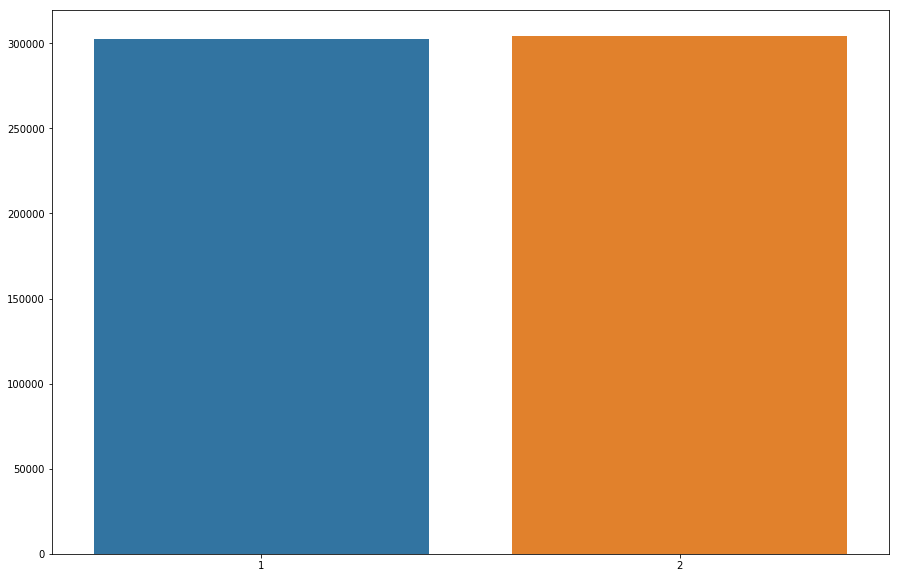

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(list(gender_stats.keys()), list(gender_stats.values()))

In [26]:
age_stats = defaultdict(int)
for i, u in enumerate(db.users.find({'sex':1})):
    age_stats[u['age']] += 1

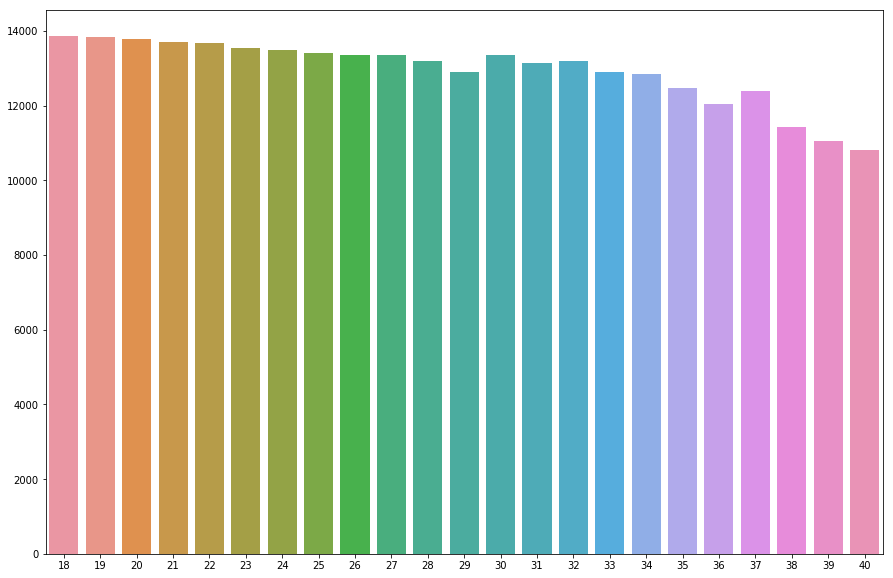

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(list(age_stats.keys()), list(age_stats.values()))

In [ ]:
links_list = get_links_set(db)
print(len(links_list))

In [120]:
domains = [tldextract.extract(url).domain for url in links_list]
d_counter = Counter(domains)

top_domains = d_counter.most_common()[:25]

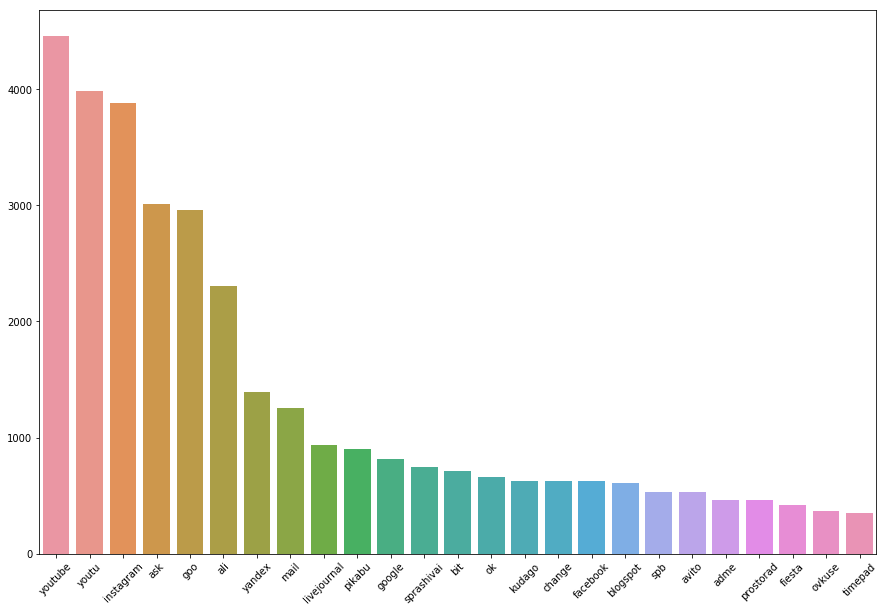

In [121]:
plt.figure(figsize=(15,10))
sns.barplot([d[0] for d in top_domains], [d[1] for d in top_domains])
_ = plt.xticks(rotation=45)

In [122]:
sum(c for _, c in d_counter.most_common()[:25])
# for l, c in d_counter.most_common()[:25]:  

33608